# Artificial bioinspired algorithms - Differential Evolution - Nutrient alocation


Solution/nutrient combination

In [1]:
import random
import matplotlib.pyplot as plt

CR = 0.5
F = 0.8

def combination():
  items = []
  for i in range(5):
    quant = random.randint(0,199) + random.random()
    items.append(quant)
  return items



In [2]:
combination()


[173.77920370346462,
 171.96222838228607,
 94.72016596126976,
 148.95319824455333,
 3.8001595607312106]

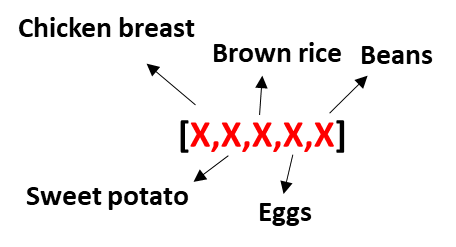

Population of solutions

In [3]:
def population(num):
  pop = []
  for i in range(num):
    pop.append(combination())
  return pop


In [4]:
pop = population(5)

for i in pop:
  print(i)



[145.74723522246285, 119.5503329719389, 108.11575793248473, 51.985822302532654, 78.13867797159321]
[110.65913762037462, 122.13438838567208, 127.11874796443333, 74.86862750014099, 10.671678211389963]
[67.38932062194382, 132.13071023811352, 48.963276572162854, 168.215803451525, 197.64346720654655]
[78.05742745557447, 77.28999830545999, 55.84067816601144, 171.80002259144928, 147.47293657286167]
[177.42244870334454, 29.1985343453058, 16.663913165619967, 48.79316008091053, 22.444448797273495]


Objective/fitness function

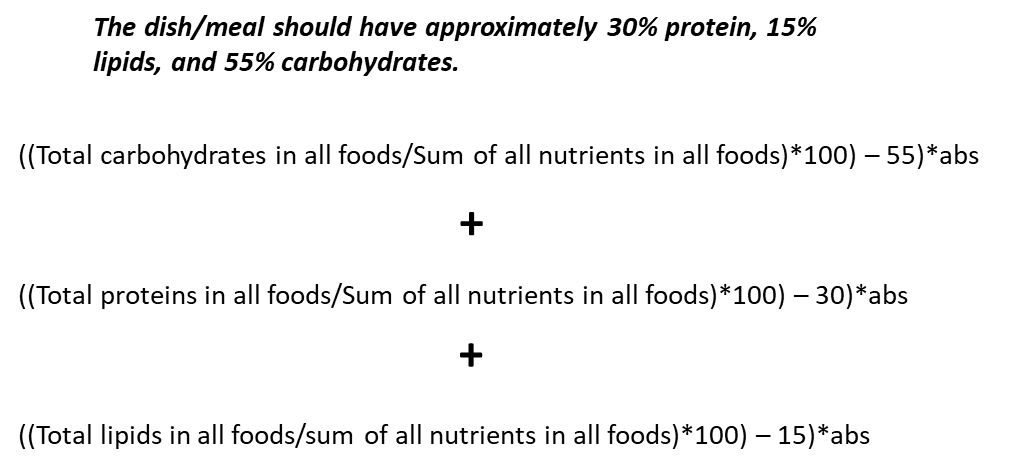

In [5]:
def divergence(dish,show=True):
  carbs = dish[0]*0.05 + dish[1]*0.24 + dish[2]*0.26 + dish[3]*0.015 + dish[4]*0.29
  prots = dish[0]*0.23 + dish[1]*0.02 + dish[2]*0.026 + dish[3]*0.13 + dish[4]*0.095
  lips = dish[0]*0.05 + dish[1]*0 + dish[2]*0.01 + dish[3]*0.089 + dish[4]*0.14

  total = carbs + lips + prots
  summ = sum(dish)

  porcCarb = (carbs/total)*100
  porcProt = (prots/total)*100
  porcLip = (lips/total)*100

  difCarb = abs(porcCarb-55)
  difProt = abs(porcProt-30)
  difLip = abs(porcLip-15)

  if show:
    print(f'Carbs: {porcCarb}')
    print(f'Lips: {porcProt}')
    print(f'Prots: {porcLip}')
    print(f'Total of grams: {summ}g')

  totalDif = difCarb + difLip + difProt
  return totalDif


In [6]:
x = combination()

print(x)
print(divergence(x,show=True))




[152.80179741065447, 58.47829360431948, 144.05257946070637, 182.81857364681875, 23.54411910763586]
Carbs: 42.04097761615099
Lips: 40.427739423646564
Prots: 17.531282960202454
Total of grams: 561.695363230135g
25.918044767698028


Selection of three vectors

In [7]:
def select3(parental,population):
  p2 = []
  three_vectors = []
  for v in population:
    if parental != v:
      p2.append(v)
  for j in range(3):
    rand = random.choice(p2)
    three_vectors.append(rand)
    p2.remove(rand)
  return three_vectors




In [8]:
pop = [[1,7,3],[4,4,4],[5,2,1],[0,0,0],[7,8,9]]
three = select3(pop[0],pop)

print(pop)
print(pop[0])
print(three)








[[1, 7, 3], [4, 4, 4], [5, 2, 1], [0, 0, 0], [7, 8, 9]]
[1, 7, 3]
[[0, 0, 0], [4, 4, 4], [5, 2, 1]]


Mutation/crossover

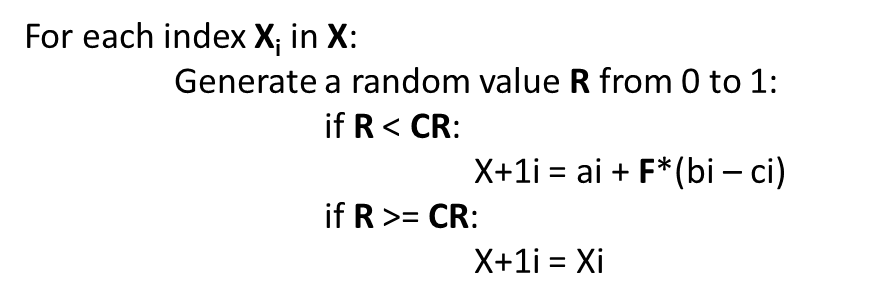

In [9]:
def mutation(parentalVector,three):
  count = 0
  A = three[0]
  B = three[1]
  C = three[2]

  trial = []

  while count < len(parentalVector):
    R = random.random()
    if R < CR:
      X = A[count] + F*abs(B[count]-C[count])
      trial.append(X)
    else:
      trial.append(parentalVector[count])
    count += 1
  return trial



In [10]:
pop = [[1, 7, 3], [4, 4, 4], [5, 2, 1], [0, 0, 0], [7, 8, 9]]
parental = pop[0]
m = mutation(parental,select3(parental,pop))

print(parental)
print(m)
print(pop)




[1, 7, 3]
[1, 11.2, 3]
[[1, 7, 3], [4, 4, 4], [5, 2, 1], [0, 0, 0], [7, 8, 9]]


Best vector

In [11]:
def bestVector(pop):
  scores = []
  for i in pop:
    scores.append(divergence(i))
  indice = scores.index(min(scores))
  return pop[indice]




In [12]:
pop1 = population(10)
bestV = bestVector(pop1)

print(pop1)
print(bestV)
print(divergence(bestV))








Carbs: 37.913653522003415
Lips: 41.86382697024209
Prots: 20.222519507754498
Total of grams: 615.4644037145573g
Carbs: 40.560730938765644
Lips: 42.14009666908345
Prots: 17.299172392150915
Total of grams: 465.27896772836107g
Carbs: 35.08627650854426
Lips: 43.172297401809004
Prots: 21.741426089646726
Total of grams: 451.03752163785754g
Carbs: 52.99973748989822
Lips: 27.222967526045394
Prots: 19.777294984056372
Total of grams: 285.94396919153746g
Carbs: 59.64089890312982
Lips: 22.596293281994992
Prots: 17.762807814875174
Total of grams: 274.383049914852g
Carbs: 48.01677378998987
Lips: 33.53688846879345
Prots: 18.446337741216677
Total of grams: 524.6856587545803g
Carbs: 56.67760769579475
Lips: 28.843039109644884
Prots: 14.479353194560368
Total of grams: 653.1476006520363g
Carbs: 53.80061733306331
Lips: 24.596452032259116
Prots: 21.602930634677577
Total of grams: 468.54052049212675g
Carbs: 61.135419153113915
Lips: 20.531603391153467
Prots: 18.332977455732614
Total of grams: 447.8525091767449

Algorithm

Carbs: 49.844780889184
Lips: 28.482466181613603
Prots: 21.672752929202392
Total of grams: 769.3826531333867g
Carbs: 34.81287761395347
Lips: 40.63379764290764
Prots: 24.553324743138894
Total of grams: 436.71637120639355g
Carbs: 51.300017285085396
Lips: 30.026263915571526
Prots: 18.673718799343067
Total of grams: 773.3699649844017g
Carbs: 54.916088875008185
Lips: 26.01011248881585
Prots: 19.073798636175958
Total of grams: 492.42383972080427g
Carbs: 49.091726881553775
Lips: 34.044385911558486
Prots: 16.863887206887743
Total of grams: 841.8594927931055g
Carbs: 49.96873969524068
Lips: 30.595177886740032
Prots: 19.436082418019303
Total of grams: 608.1812696296834g
Carbs: 52.511013683953635
Lips: 29.007517870909926
Prots: 18.481468445136453
Total of grams: 1087.7681928289073g
Carbs: 49.844780889184
Lips: 28.482466181613603
Prots: 21.672752929202392
Total of grams: 769.3826531333867g
Carbs: 56.44172472494232
Lips: 25.349436580240308
Prots: 18.20883869481737
Total of grams: 972.9228971113303g
C

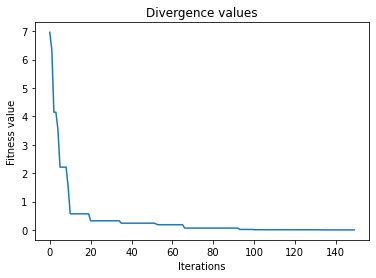

In [13]:
popul = population(5)
bests = []

for i in range(150):
  for j in popul:
    tri = select3(j,popul)
    trial = mutation(j,tri)
    if divergence(trial) < divergence(j):
      popul.remove(j)
      popul.append(trial)
  print(f'Best vector {bestVector(popul)}')
  print(f'Fitness value: {divergence(bestVector(popul))}')
  bests.append(divergence(bestVector(popul)))
  print()

plt.plot(bests)
plt.xlabel('Iterations')
plt.ylabel('Fitness value')
plt.title('Divergence values')
plt.show()



In [14]:
divergence([38.17914215025426, 19.177136865465904, 274.78521768501264, 257.12827590436353, 80.05218735225124],show=True)

Carbs: 52.222178550414235
Lips: 28.511160856055877
Prots: 19.266660593529885
Total of grams: 669.3219599573475g


8.533321187059773